##### Mediapipe 全身偵測 ( Holistic )
這篇教學會使用 MediaPipe 的全身偵測模型 ( Holistic ) 偵測人體，抓取頭、四肢等軀幹部位，\
再透過 OpenCV 讀取攝影鏡頭影像進行辨識，將五官、頭手四肢軀幹標記出節點以及骨架。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 使用 MediaPipe，偵測並繪製身體骨架 
Mediapipe Holistic 集合了人體姿勢、面部標誌和手部追蹤三種模型與相關的演算法，可以偵測身體姿勢、臉部網格、手掌動作，\
完整偵測則會產生 543 個偵測節點 ( 33 個姿勢節點、468 個臉部節點和每隻手 21 個手部節點 )。

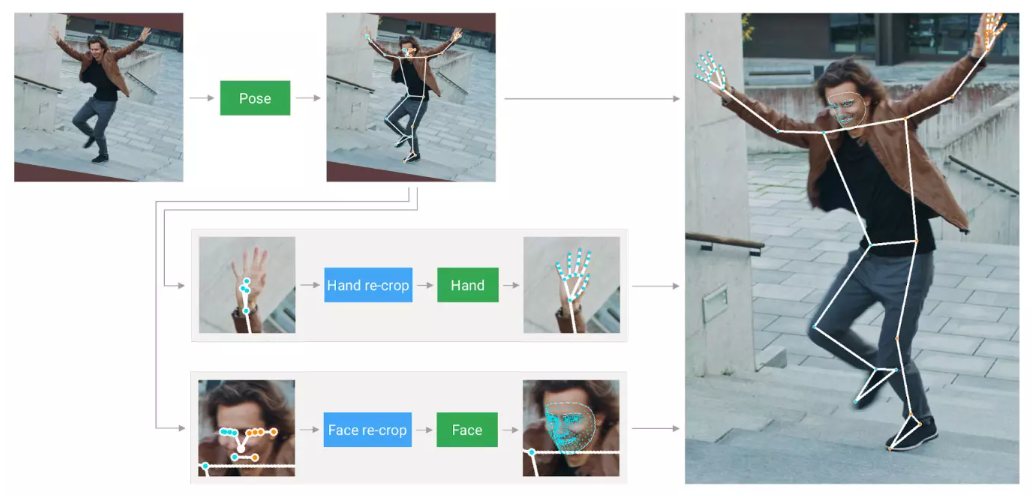

下方的程式碼延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，搭配 mediapipe 全身偵測的方法，透過攝影鏡頭獲取影像後，即時標記出身體骨架和動作。

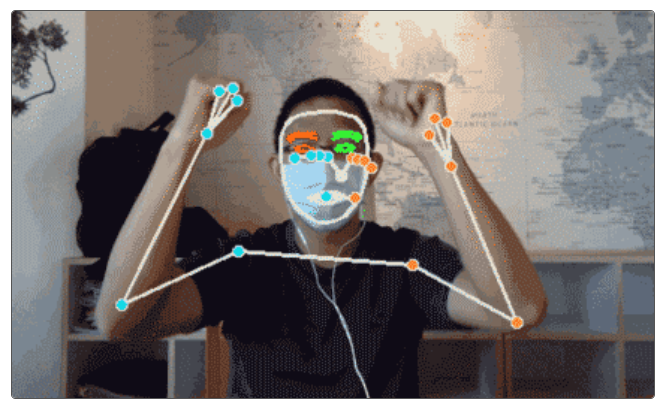

In [ ]:
import cv2
import mediapipe as mp

# 初始化 mediapipe 的繪圖工具和全身偵測模組
mp_drawing = mp.solutions.drawing_utils         # mediapipe 繪圖方法
mp_drawing_styles = mp.solutions.drawing_styles # mediapipe 繪圖樣式
mp_holistic = mp.solutions.holistic             # mediapipe 全身偵測方法

# 開啟攝影機
cap = cv2.VideoCapture(0)

# mediapipe 啟用偵測全身
with mp_holistic.Holistic(
    min_detection_confidence=0.5,  # 最小偵測信心值
    min_tracking_confidence=0.5) as holistic:  # 最小追蹤信心值

    if not cap.isOpened():
        print("Cannot open camera")  # 無法開啟攝影機
        exit()
    
    while True:
        ret, img = cap.read()  # 讀取攝影機影像
        if not ret:
            print("Cannot receive frame")  # 無法接收影像
            break
        
        img = cv2.resize(img, (1920, 1080))  # 縮小尺寸，加快演算速度
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換成 RGB
        
        results = holistic.process(img2)  # 開始偵測全身
        
        # 面部偵測，繪製臉部網格
        mp_drawing.draw_landmarks(
            img,  # 原始影像
            results.face_landmarks,  # 偵測結果中的臉部節點
            mp_holistic.FACEMESH_CONTOURS,  # 臉部網格輪廓
            landmark_drawing_spec=None,  # 標記樣式
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()  # 連接樣式
        )
        
        # 身體偵測，繪製身體骨架
        mp_drawing.draw_landmarks(
            img,  # 原始影像
            results.pose_landmarks,  # 偵測結果中的身體節點
            mp_holistic.POSE_CONNECTIONS,  # 身體節點之間的連接
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()  # 標記樣式
        )

        cv2.imshow('oxxostudio', img)  # 顯示影像
        if cv2.waitKey(5) == ord('q'):
            break  # 按下 q 鍵停止
        
cap.release()  # 釋放攝影機資源
cv2.destroyAllWindows()  # 關閉所有 OpenCV 視窗

參考資料 
* [MediaPipe Holistic](https://google.github.io/mediapipe/solutions/holistic#python-solution-api)